In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings( "ignore")

In [4]:
df=pd.read_csv('machine Learning/Heart2.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BP Meds              4240 non-null   float64
 1   prevalentStroke      4240 non-null   float64
 2   prevalentHyp         4240 non-null   float64
 3   diabetes             4240 non-null   float64
 4   high_risk_age_group  4240 non-null   int64  
 5   bmi_risk             4240 non-null   int64  
 6   smoking_riskkk       4240 non-null   int64  
 7   cholesterol_risk     4240 non-null   int64  
 8   gender_risk          4240 non-null   int64  
 9   Heartrate_risk       4240 non-null   int64  
 10  Diastolic_BP_risk    4240 non-null   int64  
 11  Systolic_BP_risk     4240 non-null   int64  
 12  Glucose_risk         4240 non-null   int64  
 13  education_new        4240 non-null   float64
 14  Heart-Att            4240 non-null   int64  
dtypes: float64(5), int64(10)
memory usage:

In [7]:
corr=df.corr()

<Axes: >

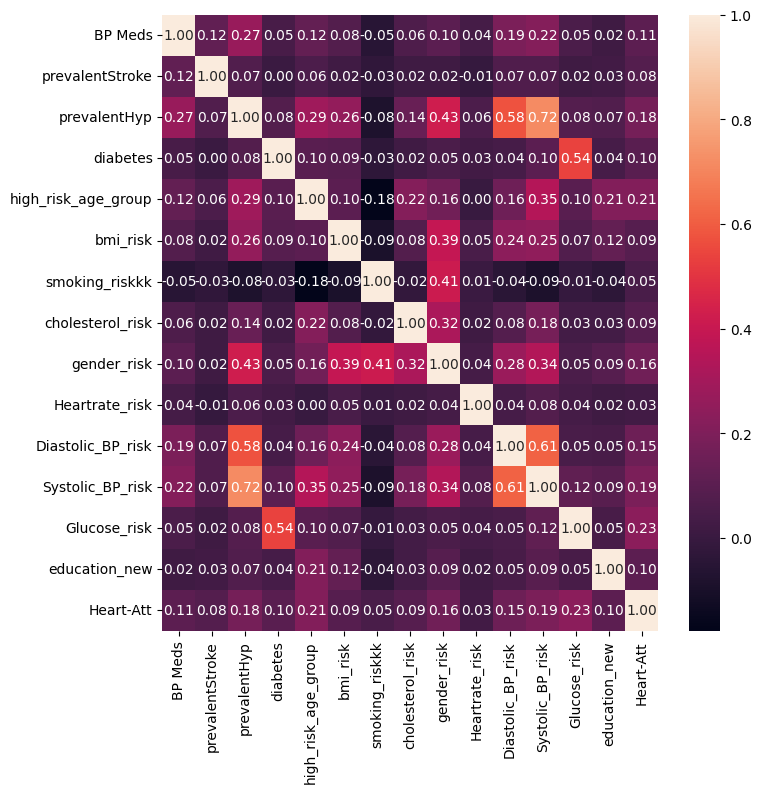

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,fmt='.2f')

In [11]:
df['BP_RISK']=df['prevalentHyp']+df['Systolic_BP_risk']+df['Diastolic_BP_risk']

In [12]:
df['Life_style_Risk']=df['bmi_risk']+df['cholesterol_risk']+df['smoking_riskkk']

In [13]:
df['Medical_History_Risk']=df['diabetes']+df['prevalentStroke']

In [15]:
df.columns

Index(['BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'high_risk_age_group', 'bmi_risk', 'smoking_riskkk', 'cholesterol_risk',
       'gender_risk', 'Heartrate_risk', 'Diastolic_BP_risk',
       'Systolic_BP_risk', 'Glucose_risk', 'education_new', 'Heart-Att',
       'BP_RISK', 'Life_style_Risk', 'Medical_History_Risk'],
      dtype='object')

In [18]:
df['Total_risk'] = (
    df['BP Meds'] +
    df['prevalentStroke'] +
    df['prevalentHyp'] +
    df['diabetes'] +
    df['high_risk_age_group'] +
    df['bmi_risk'] +
    df['smoking_riskkk'] +
    df['cholesterol_risk'] +
    df['gender_risk'] +
    df['Heartrate_risk'] +
    df['Diastolic_BP_risk'] +
    df['Systolic_BP_risk'] +
    df['Glucose_risk'] +
    df['education_new']
)


In [19]:
df.columns

Index(['BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'high_risk_age_group', 'bmi_risk', 'smoking_riskkk', 'cholesterol_risk',
       'gender_risk', 'Heartrate_risk', 'Diastolic_BP_risk',
       'Systolic_BP_risk', 'Glucose_risk', 'education_new', 'Heart-Att',
       'BP_RISK', 'Life_style_Risk', 'Medical_History_Risk', 'Total_risk'],
      dtype='object')

In [21]:
dfn=df[['BP Meds','high_risk_age_group','gender_risk','Heartrate_risk','Glucose_risk','education_new','BP_RISK'
,'Life_style_Risk','Medical_History_Risk','Total_risk']]

In [22]:
df1=df[['BP Meds','high_risk_age_group','gender_risk','Heartrate_risk','Glucose_risk','education_new','BP_RISK'
,'Life_style_Risk','Medical_History_Risk','Total_risk','Heart-Att']]

In [23]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BP Meds               4240 non-null   float64
 1   high_risk_age_group   4240 non-null   int64  
 2   gender_risk           4240 non-null   int64  
 3   Heartrate_risk        4240 non-null   int64  
 4   Glucose_risk          4240 non-null   int64  
 5   education_new         4240 non-null   float64
 6   BP_RISK               4240 non-null   float64
 7   Life_style_Risk       4240 non-null   int64  
 8   Medical_History_Risk  4240 non-null   float64
 9   Total_risk            4240 non-null   float64
 10  Heart-Att             4240 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 364.5 KB


In [24]:
x=df1.drop('Heart-Att',axis=1)

In [41]:
for col in x.columns:
    print(pd.crosstab(df1[col],df['Heart-Att'],normalize='index'))

Heart-Att         0         1
BP Meds                      
0.0        0.855605  0.144395
1.0        0.649351  0.350649
Heart-Att                   0         1
high_risk_age_group                    
0                    0.958633  0.041367
1                    0.899519  0.100481
2                    0.802701  0.197299
3                    0.722787  0.277213
Heart-Att           0         1
gender_risk                    
0            0.937847  0.062153
1            0.885481  0.114519
2            0.850644  0.149356
3            0.787537  0.212463
Heart-Att              0         1
Heartrate_risk                    
0               0.849305  0.150695
1               0.772727  0.227273
Heart-Att            0         1
Glucose_risk                    
0             0.866447  0.133553
1             0.856115  0.143885
2             0.374194  0.625806
Heart-Att             0         1
education_new                    
0.0            0.890706  0.109294
1.0            0.872093  0.127907
2.0    

In [482]:
df['Glucose_risk'].value_counts()

Glucose_risk
0    3946
2     155
1     139
Name: count, dtype: int64

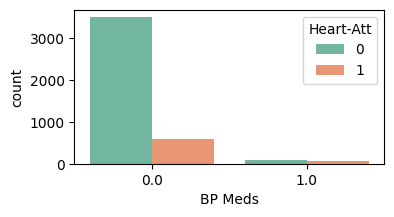

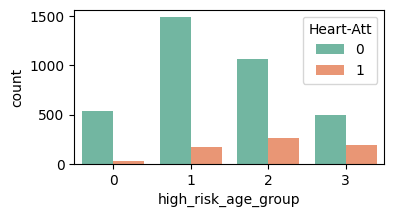

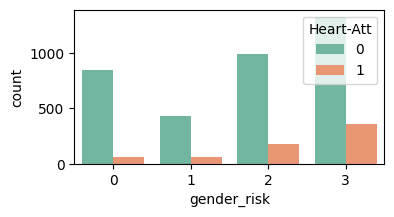

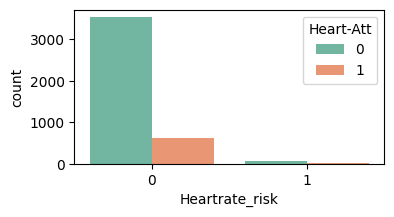

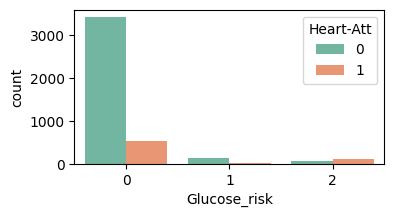

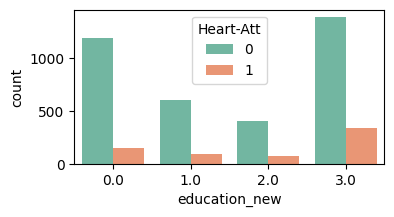

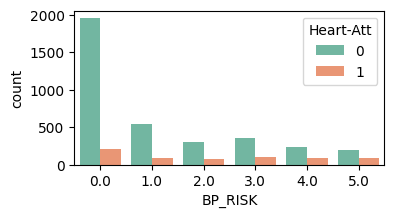

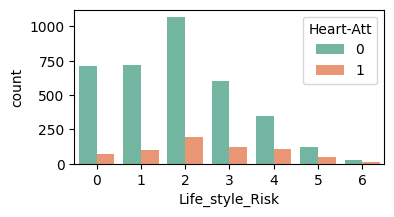

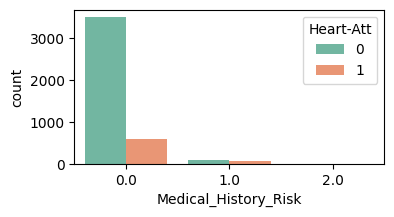

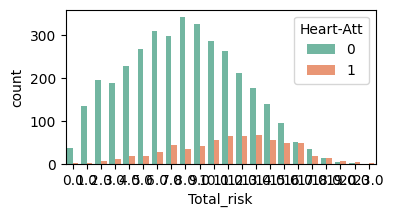

In [26]:
for col in x.columns:
    plt.figure(figsize=(4,2))
    sns.countplot(data=df1,x=col,hue='Heart-Att',palette='Set2')

In [27]:
df1['Medical_History_Risk'].value_counts()

Medical_History_Risk
0.0    4103
1.0     136
2.0       1
Name: count, dtype: int64

In [28]:
df1['Total_risk'].value_counts()

Total_risk
8.0     377
9.0     368
10.0    341
7.0     340
6.0     336
11.0    327
5.0     285
12.0    276
4.0     245
13.0    243
2.0     203
3.0     199
14.0    193
15.0    143
1.0     136
16.0     99
17.0     51
0.0      37
18.0     25
19.0     10
20.0      5
23.0      1
Name: count, dtype: int64

In [29]:
grp6 = df1[(df1['Life_style_Risk'] == 6) & (df1['Heart-Att'] == 1)]


In [31]:
grp6.value_counts().sum()

np.int64(9)

In [32]:
grp6 = df1[(df1['Life_style_Risk'] == 6) & (df1['Heart-Att'] == 0)]

In [33]:
grp6.value_counts().sum()

np.int64(28)

In [34]:
# Copy the DataFrame to avoid modifying original if needed
df1.loc[(df1['Life_style_Risk'] == 6) & (df1['Heart-Att'] == 0), 'Life_style_Risk'] = 0
df1.loc[(df1['Life_style_Risk'] == 6) & (df1['Heart-Att'] == 1), 'Life_style_Risk'] = 5


In [38]:
df1['Life_style_Risk'].value_counts()

Life_style_Risk
2    1261
1     816
0     807
3     726
4     453
5     177
Name: count, dtype: int64

In [40]:
pd.crosstab(df1['Life_style_Risk'],df['Heart-Att'],normalize='index')

Heart-Att,0,1
Life_style_Risk,,
0,0.914498,0.085502
1,0.877451,0.122549
2,0.846947,0.153053
3,0.831956,0.168044
4,0.766004,0.233996
5,0.694915,0.305085


In [42]:
df['BP_RISK'].value_counts()

BP_RISK
0.0    2165
1.0     629
3.0     454
2.0     371
4.0     333
5.0     288
Name: count, dtype: int64

In [43]:
pd.crosstab(df1['Total_risk'],df['Heart-Att'],normalize='index')

Heart-Att,0,1
Total_risk,,
0.0,0.972973,0.027027
1.0,0.992647,0.007353
2.0,0.965517,0.034483
3.0,0.949749,0.050251
4.0,0.930612,0.069388
5.0,0.940351,0.059649
6.0,0.916667,0.083333
7.0,0.873529,0.126471
8.0,0.907162,0.092838


In [44]:
df1['Total_risk_score']=df1['Total_risk'].replace({0:0,1:0,2:0,3:0,4:0,5:0,6:0,8:0,9:1,7:2,10:3,11:4,12:5,13:6,14:7,15:8,
                                                  17:9,16:10,18:10,20:11,19:12,23:13})

In [45]:
pd.crosstab(df1['Total_risk_score'],df['Heart-Att'],normalize='index')

Heart-Att,0,1
Total_risk_score,,
0.0,0.936194,0.063806
1.0,0.885870,0.114130
2.0,0.873529,0.126471
3.0,0.838710,0.161290
4.0,0.801223,0.198777
5.0,0.764493,0.235507
6.0,0.728395,0.271605
7.0,0.715026,0.284974
8.0,0.664336,0.335664


In [46]:
df1.drop('Total_risk',axis=1,inplace=True)

In [47]:
corr=df1.corr()

<Axes: >

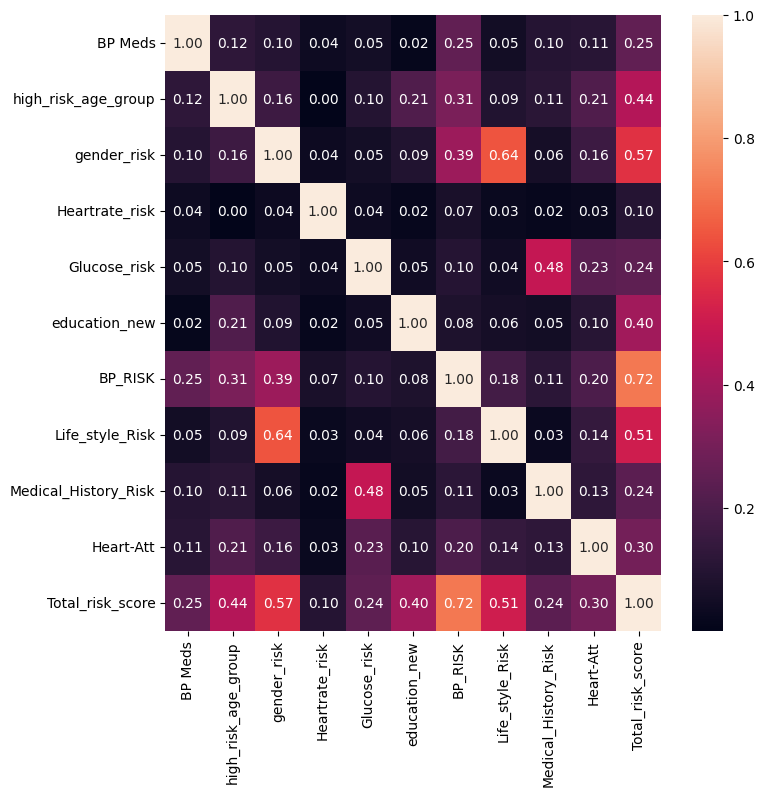

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,fmt='.2f')

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BP Meds               4240 non-null   float64
 1   high_risk_age_group   4240 non-null   int64  
 2   gender_risk           4240 non-null   int64  
 3   Heartrate_risk        4240 non-null   int64  
 4   Glucose_risk          4240 non-null   int64  
 5   education_new         4240 non-null   float64
 6   BP_RISK               4240 non-null   float64
 7   Life_style_Risk       4240 non-null   int64  
 8   Medical_History_Risk  4240 non-null   float64
 9   Heart-Att             4240 non-null   int64  
 10  Total_risk_score      4240 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 364.5 KB


In [49]:
from sklearn.model_selection import train_test_split

In [108]:
#x=df1.drop(['Heart-Att'],axis=1)

In [458]:
x=df1[['high_risk_age_group','education_new','Total_risk_score']]

In [459]:
y=df1['Heart-Att']

In [460]:
x.shape

(4240, 3)

In [461]:
y.shape

(4240,)

In [462]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [463]:
from sklearn.ensemble import RandomForestClassifier

In [464]:
RF=RandomForestClassifier(oob_score=True,random_state=42)

In [465]:
RF.fit(xtrain,ytrain)

RandomForestClassifier(oob_score=True, random_state=42)

In [466]:
RF.score(xtrain,ytrain)

0.8544474393530997

In [467]:
RF.score(xtest,ytest)

0.8498427672955975

In [468]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [469]:
ytrain_predict=RF.predict(xtrain)
ytest_predict=RF.predict(xtest)

In [470]:
print(classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2519
           1       0.67      0.07      0.13       449

    accuracy                           0.85      2968
   macro avg       0.77      0.53      0.53      2968
weighted avg       0.83      0.85      0.80      2968



In [471]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1077
           1       0.59      0.07      0.12       195

    accuracy                           0.85      1272
   macro avg       0.72      0.53      0.52      1272
weighted avg       0.81      0.85      0.80      1272



In [472]:
from xgboost import XGBClassifier

In [473]:
from collections import Counter

In [474]:
counter=Counter(ytrain)
scale=counter[0]/counter[1]

In [475]:
print(scale)

5.610244988864142


In [476]:
xgb=XGBClassifier( n_estimators=300,
    max_depth=20,
    random_state=42,scale_pos_weight=5,booster='gbtree',learning_rate=0.8,
                  gamma=0,min_child_weight=1,colsample_bytree=1,colsample_bylevel=1,grow_policy='depthwise')

In [477]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0, grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [478]:
ytrain_predict=xgb.predict(xtrain)
ytest_predict=xgb.predict(xtest)

In [479]:
print(classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81      2519
           1       0.31      0.73      0.43       449

    accuracy                           0.71      2968
   macro avg       0.62      0.72      0.62      2968
weighted avg       0.84      0.71      0.75      2968



In [480]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1077
           1       0.25      0.59      0.35       195

    accuracy                           0.67      1272
   macro avg       0.58      0.64      0.57      1272
weighted avg       0.80      0.67      0.71      1272



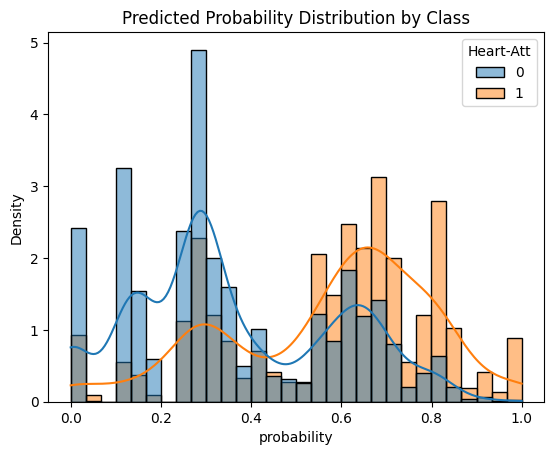

In [481]:
probs = xgb.predict_proba(x)[:, 1]

# 2. Combine probs and true labels into a DataFrame
df_plot = pd.DataFrame({
    'probability': probs,
    'Heart-Att': y
})

# 3. Plot using seaborn
sns.histplot(data=df_plot, x='probability', hue='Heart-Att', bins=30, kde=True, stat="density", common_norm=False)
plt.title("Predicted Probability Distribution by Class")
plt.show()

In [133]:
import shap

100%|===================| 1267/1272 [01:43<00:00]        

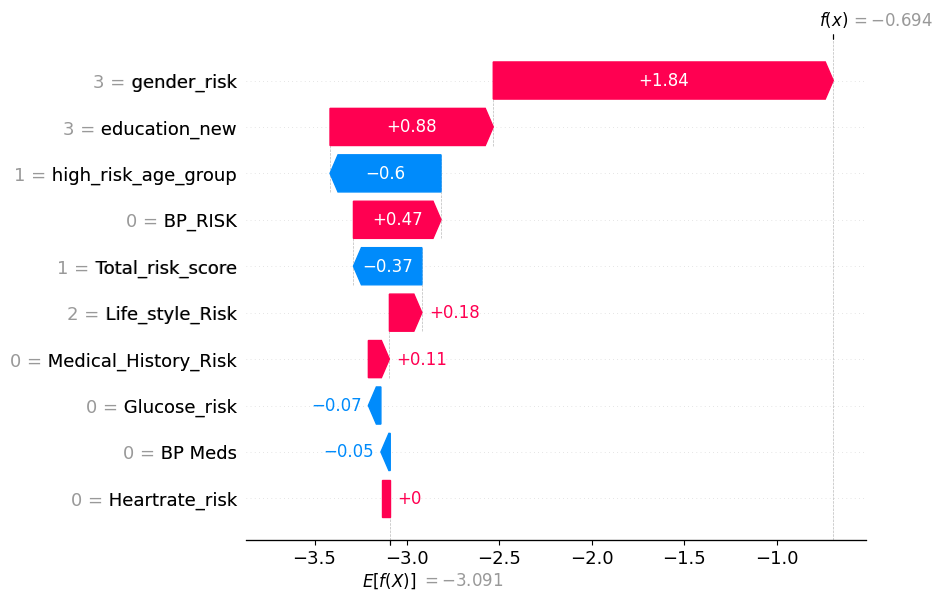

In [134]:
explainer = shap.Explainer(xgb, xtrain)
shap_values = explainer(xtest)
shap.plots.waterfall(shap_values[1])

 99%|===================| 1261/1272 [01:41<00:00]        

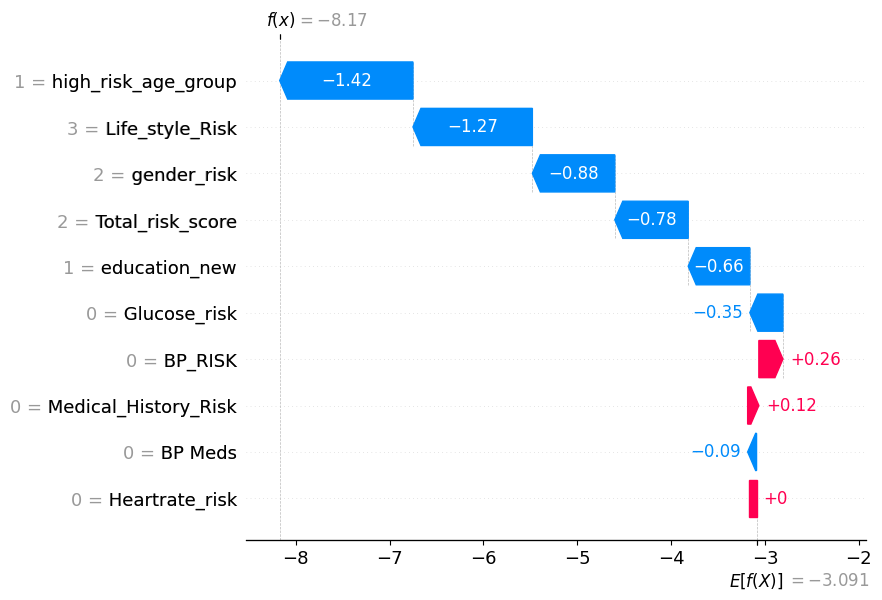

In [136]:
explainer = shap.Explainer(xgb, xtrain)
shap_values = explainer(xtest)
shap.plots.waterfall(shap_values[0])

In [144]:
X=xtest

In [147]:
explainer = shap.Explainer(xgb, X)
shap_values = explainer(X)  # <-- This gives Explanation object (new API)


 98%|===================| 1251/1272 [00:43<00:00]        

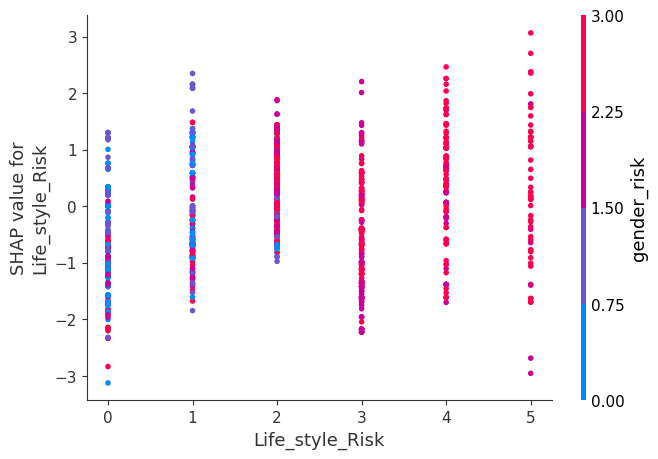

In [148]:
# Convert to numpy array
shap_vals_array = shap_values.values  # Now it's a NumPy array

# Now run dependence_plot
shap.dependence_plot('Life_style_Risk', shap_vals_array, X)
